# Intro to iGraph


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



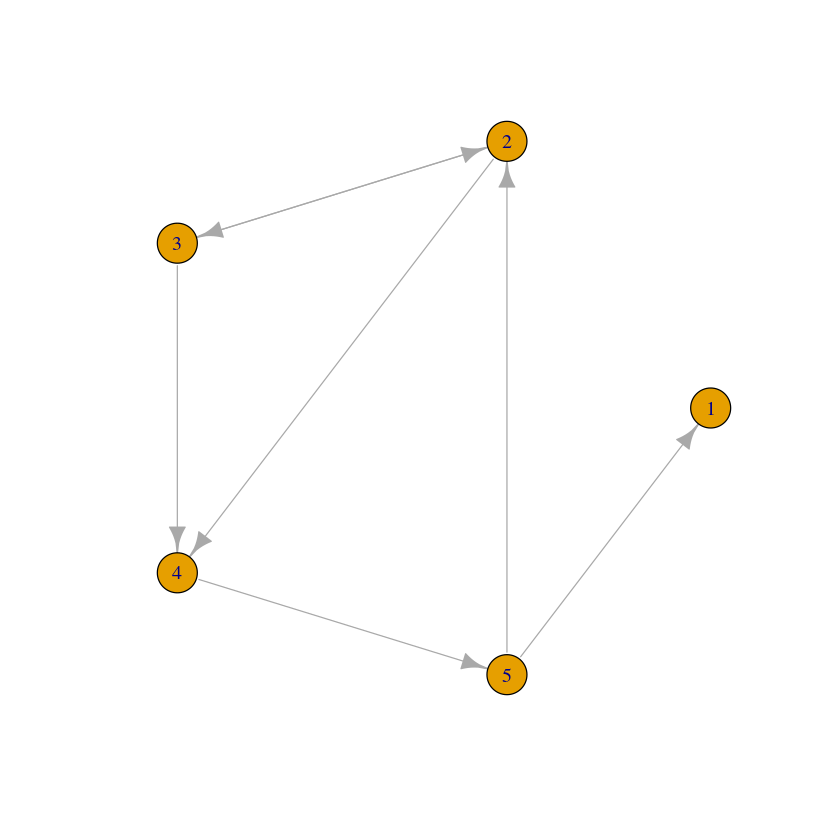

In [1]:
# Webs
# http://www.shizukalab.com/toolkits/sna/sna_data
# http://igraph.org/r/doc/
# Cargando la librería igraph
# install.packages("igraph")
library(igraph)
# Construyendo mi primer grafo
g <- make_empty_graph(n = 5, directed=TRUE) %>% add_edges(c(2,3, 2,4, 3,2, 3,4, 4,5, 5,2, 5,1))
# plot(g)
plot(g, layout=layout_in_circle)
# Layouts
# layout_components     layout_on_sphere      layout_with_fr        layout_with_lgl
# layout_as_bipartite   layout_in_circle      layout_randomly       layout_with_gem       layout_with_mds
# layout_as_star        layout_nicely         layout_with_dh        layout_with_graphopt  layout_with_sugiyama
# layout_as_tree        layout_on_grid        layout_with_drl       layout_with_kk

,1,2,3,4,5,6,7
1,0,1,0,1,0,1,0
2,1,0,1,1,0,1,0
3,0,1,0,0,0,0,0
4,1,1,0,0,1,1,0
5,0,0,0,1,0,1,0
6,1,1,0,1,1,0,1
7,0,0,0,0,0,1,0


IGRAPH 4229989 UN-- 7 10 -- 
+ attr: name (v/c)
+ edges from 4229989 (vertex names):
 [1] 1--2 1--4 1--6 2--3 2--4 2--6 4--5 4--6 5--6 6--7

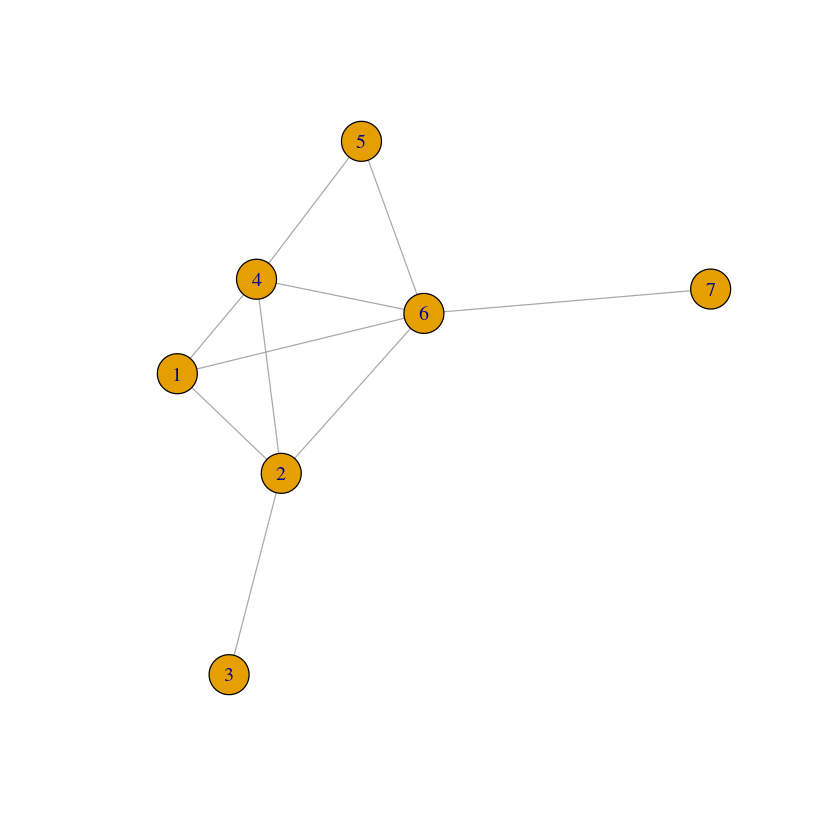

In [2]:
# Construir un grafo a partir de una matriz de adyacencias
# Descargar archivo "sample_adjmatrix.csv" del siguiente enlace:
# https://drive.google.com/open?id=0B-dmEvN59Z2ZdEowV0NxZThMeXc
dat <- read.csv("sample_adjmatrix.csv",header=TRUE,row.names=1,check.names=FALSE)
m <- as.matrix(dat)
m
g <- graph.adjacency(m,mode="undirected",weighted=NULL)
g
plot(g, layout=layout_nicely)

[1]  8  1 10  1 15  1  1  5  7  1

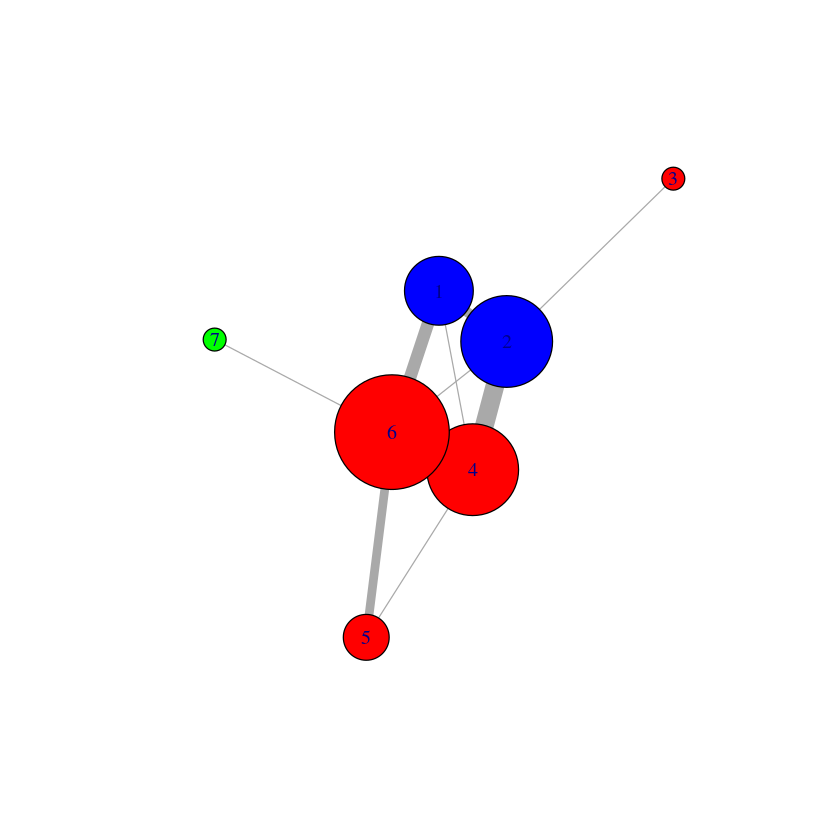

In [3]:
# Construir un grafo a partir de una matriz de adyacencia con pesos
# Descargar archivo: sample_adjmatrix_weights.csv
# https://drive.google.com/open?id=0B-dmEvN59Z2ZcDBYdzFQbHM0REE
dat <- read.csv("sample_adjmatrix_weights.csv",header=TRUE,row.names=1,check.names=FALSE)
m <- as.matrix(dat)
g <- graph.adjacency(m, mode="undirected", weighted=TRUE)
E(g)$weight
# Asignar el tamaño del nodo de acuerdo a su grado
V(g)$size <- degree(g)*10
# Asignar colores (arbitrarios) a los nodos
V(g)$color <- c("blue", "blue", rep("red",4), "green")
plot(g, vertex.color=V(g)$color, edge.width=E(g)$weight)

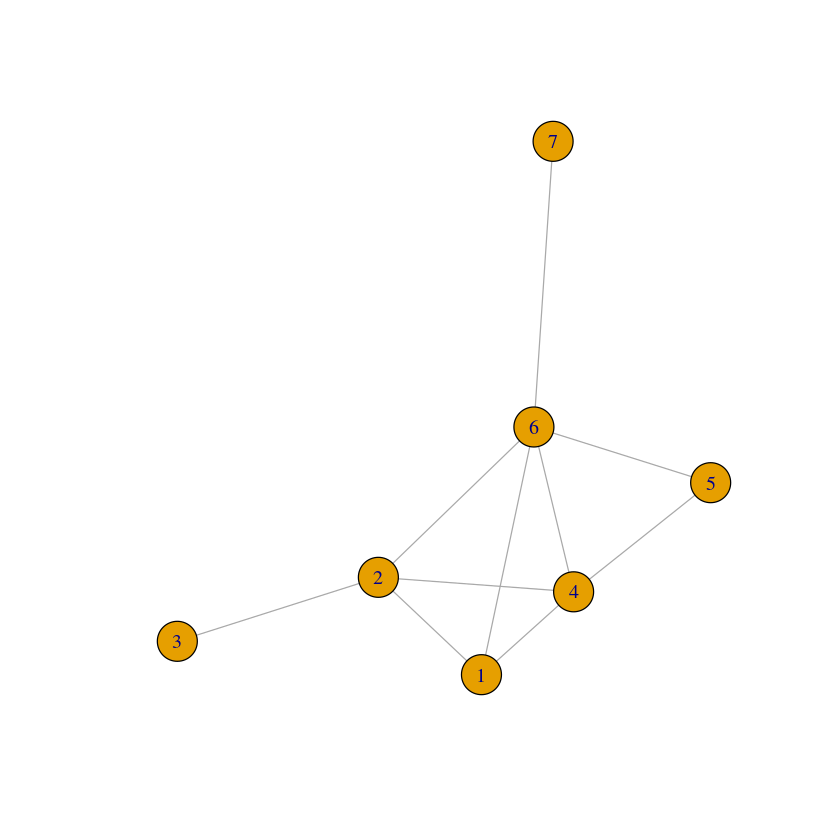

In [4]:
# Construir un grafo a partir de una lista de ramas
# Descargar archivo: sample_edgelist.csv
# https://drive.google.com/open?id=0B-dmEvN59Z2ZYVdHbXRqcnAwVHc
dat <- read.csv("sample_edgelist.csv",header=FALSE)
el <- as.matrix(dat)
g <- graph.edgelist(el,directed=FALSE)
plot(g)

from,to,capacity,weight
O,A,5,2
O,B,7,5
O,C,4,4
A,B,1,2
A,D,3,7
B,C,2,1
B,D,4,4
B,E,5,3
C,E,4,4
D,E,1,1


[1] 2 5 4 2 7 1 4 3 4 1 5 7

[1] 5 7 4 1 3 2 4 5 4 1 9 6

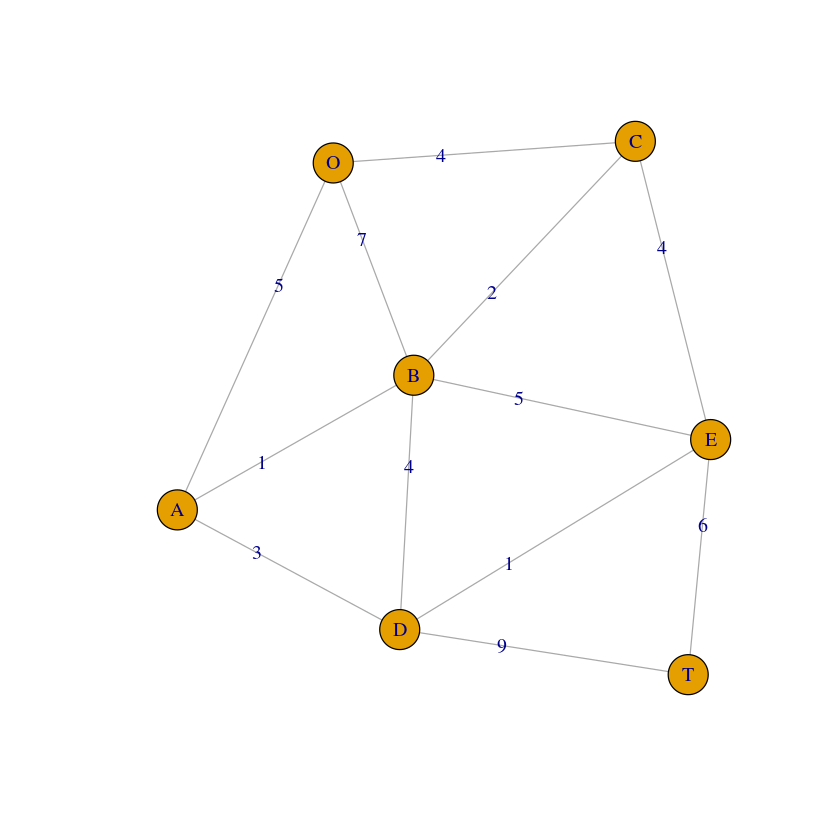

In [5]:
# Construir un grafo a partir de un dataframe
# Descargar archivo: "seervadaPark.csv"
# https://drive.google.com/open?id=0B-dmEvN59Z2Zdlg4UVY1cENVbzg
dat<-read.csv("seervadaPark.csv")
dat
g <- graph_from_data_frame(dat, directed=FALSE)
# Tenemos información respecto a las ramas de weight and capacity
E(g)$weight
E(g)$capacity
plot(g, edge.label=E(g)$capacity)

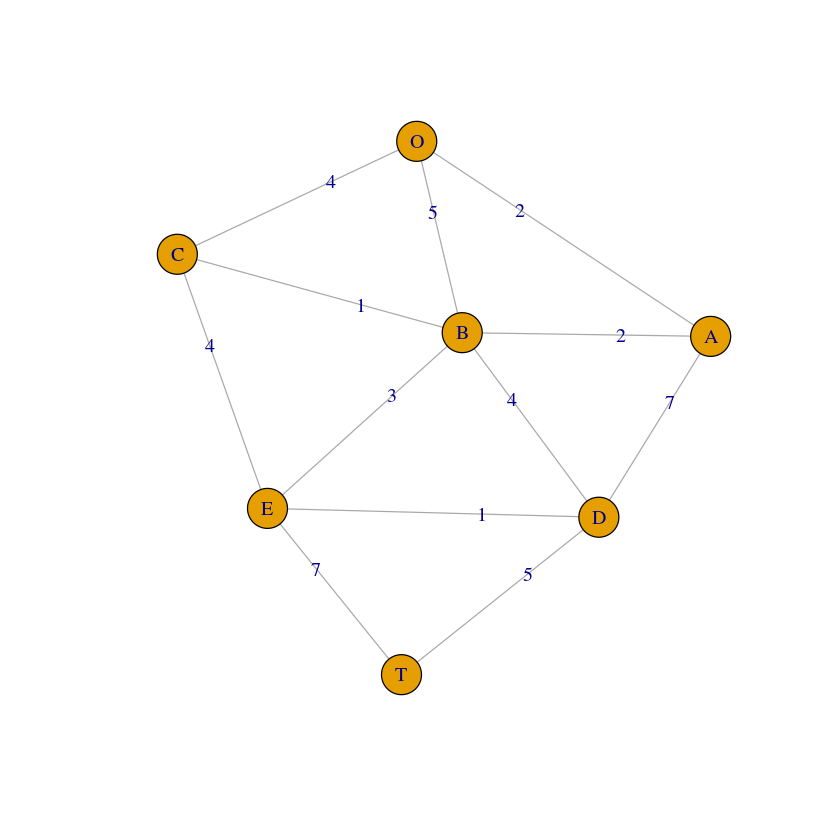

In [6]:
plot(g, edge.label=E(g)$weight)

# Network analysis

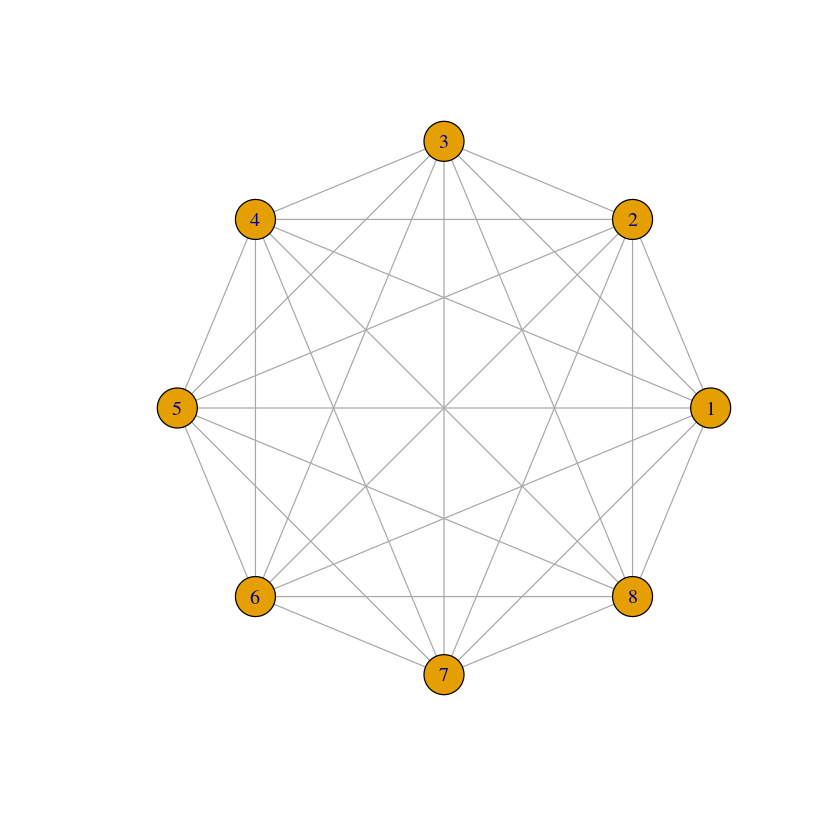

In [7]:
# Network metric analysis
# Let us start with non complex networks
library(igraph)
g <- make_full_graph(8)
plot(g, layout=layout_in_circle)

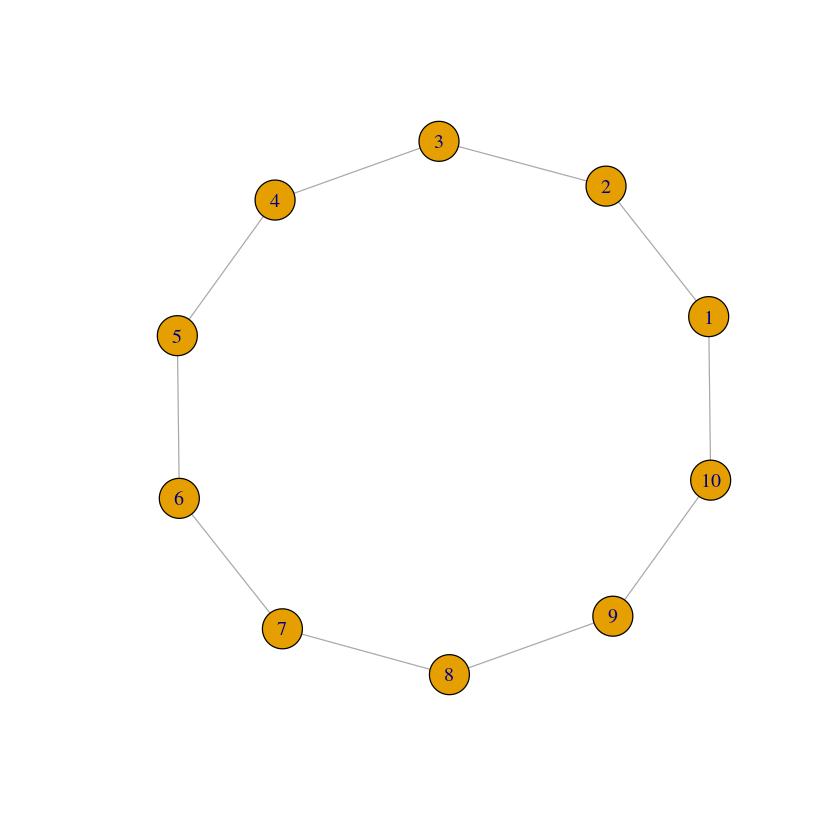

In [8]:
ring <- make_ring(10) # Builds a ring network
plot(ring)

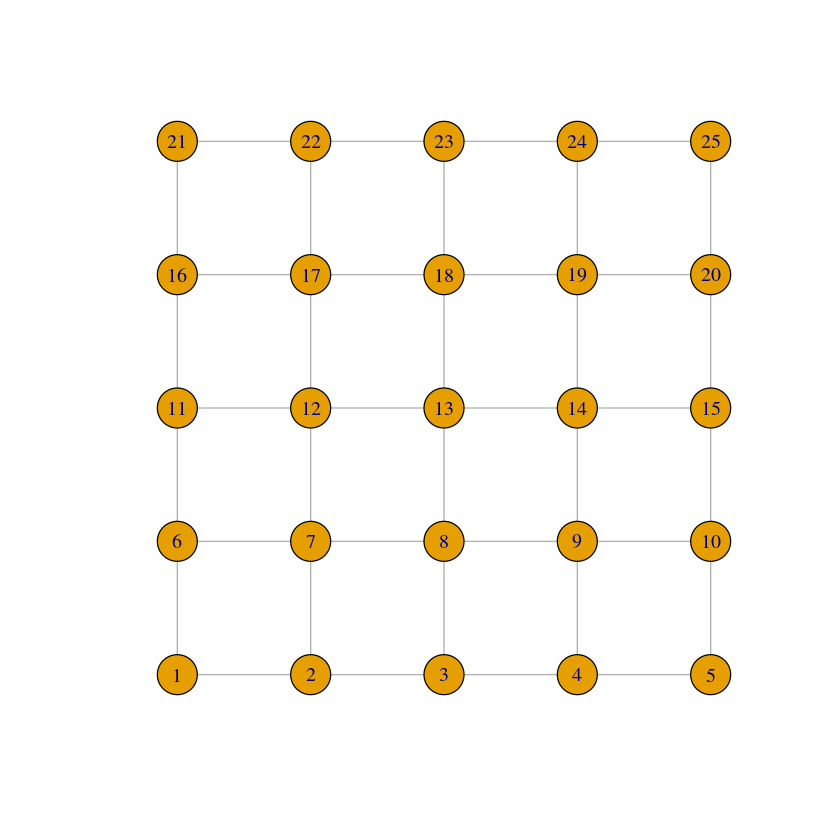

In [10]:
l <- make_lattice(length = 5, dim = 2) # Builds a lattice in 2 dim
plot(l, layout=layout_on_grid)
# Also try the following 
# l <- make_lattice(c(5, 5, 5))
# l <- make_lattice(c(4 ,3))

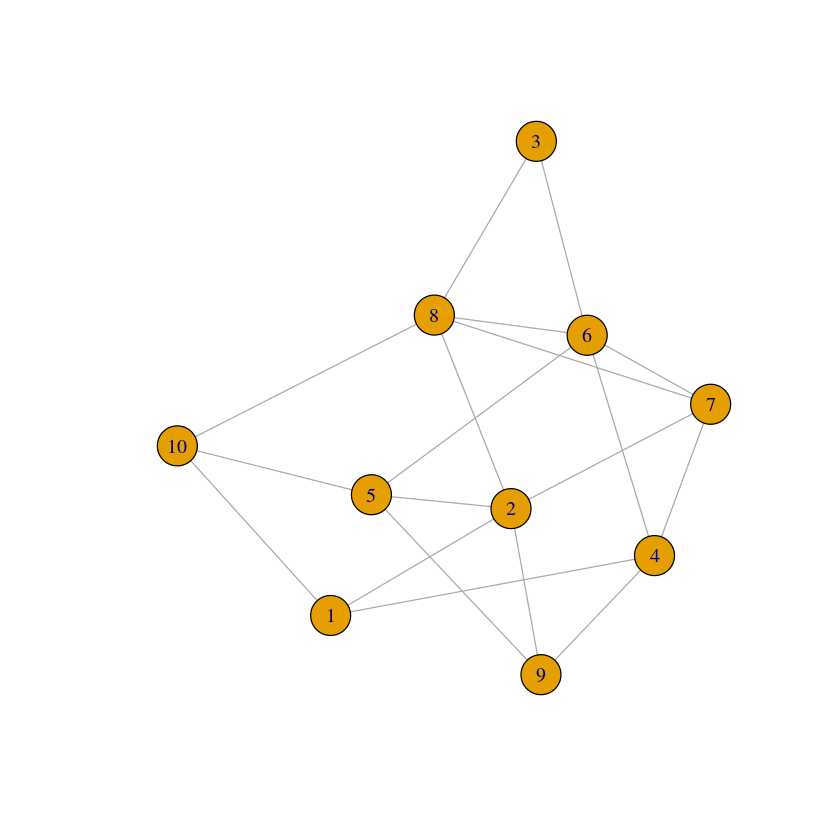

In [11]:
# Generates network using erdos renyi model with n=10^4 nodes 
# and 10^-3 probability of connection between any pair of nodes
# Almost every graph in G(n, 2*ln(n)/n) is connected.
# Go to https://en.wikipedia.org/wiki/Erdős–Rényi_model
# erdos.renyi.game(n,p) 
# n:=nodes, p:=connection probability
# Start by a small graph
er <- erdos.renyi.game(10,0.3)
plot(er, layout=layout_nicely)
# You will have a diffrent result (due to the stochastic nature of the model)

[1] 4.250443

[1] 0.001001501

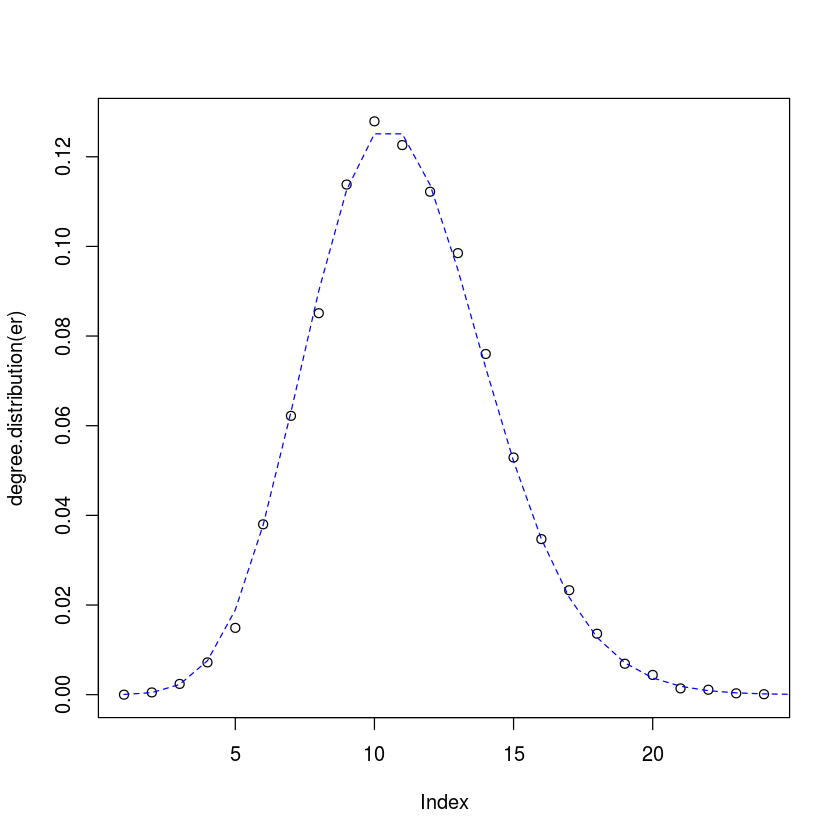

In [12]:
# Now calculate the metrics for a larger graph
er <- erdos.renyi.game(10000,0.001) 
# Now we plot the network degree distribution
# This distribution is Poisson for large n
plot(degree.distribution(er))
# In blue is depicted an rvs X~poiss(lambda=10)
x<-0:25
lines(dpois(x,10), col="blue", lty=2)
# Average path lenght L of the network
average.path.length(er)
# Clustering coefficient C of the network
transitivity(er)

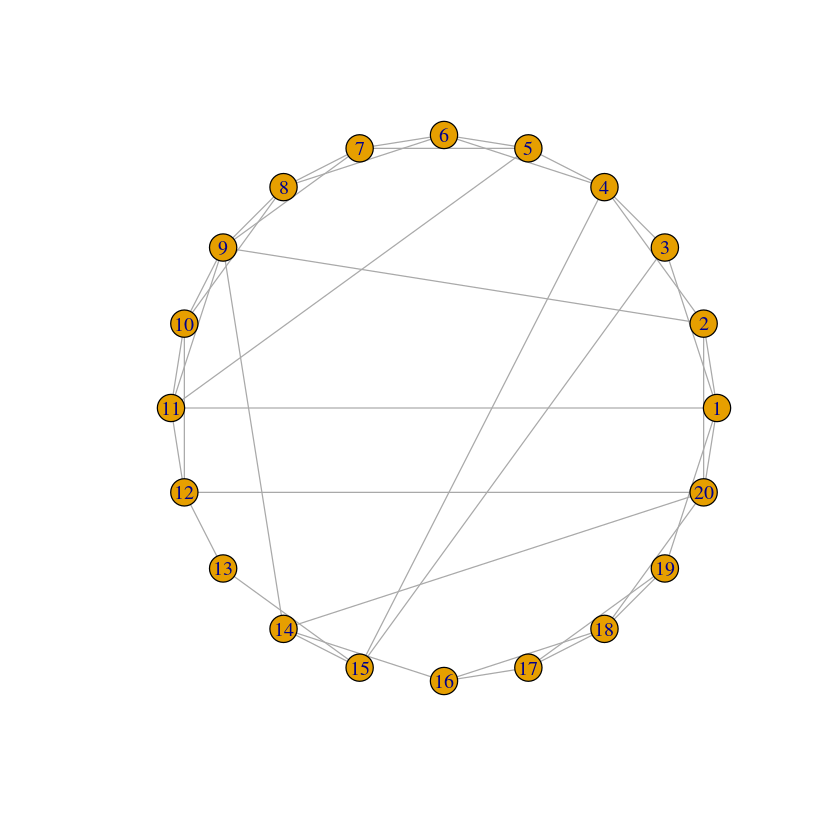

In [13]:
# Small-world network built using watts-strogatz model
# https://en.wikipedia.org/wiki/Watts_and_Strogatz_model
# watts.strogatz.game(dim=1,size=10000,nei=5, p=0.0)
# dim:=dimension 1 is a ring. 
# size:=number of nodes
# nei:=number of neighbors at left and right for nodes in the ring
# p:=omega value (w), probability of random shortcuts
#
# First build a small graph
sw <- watts.strogatz.game(1,20,2,0.1)
plot(sw, layout=layout_in_circle, vertex.size=10)

[1] 4.260945

[1] 0.0009726244

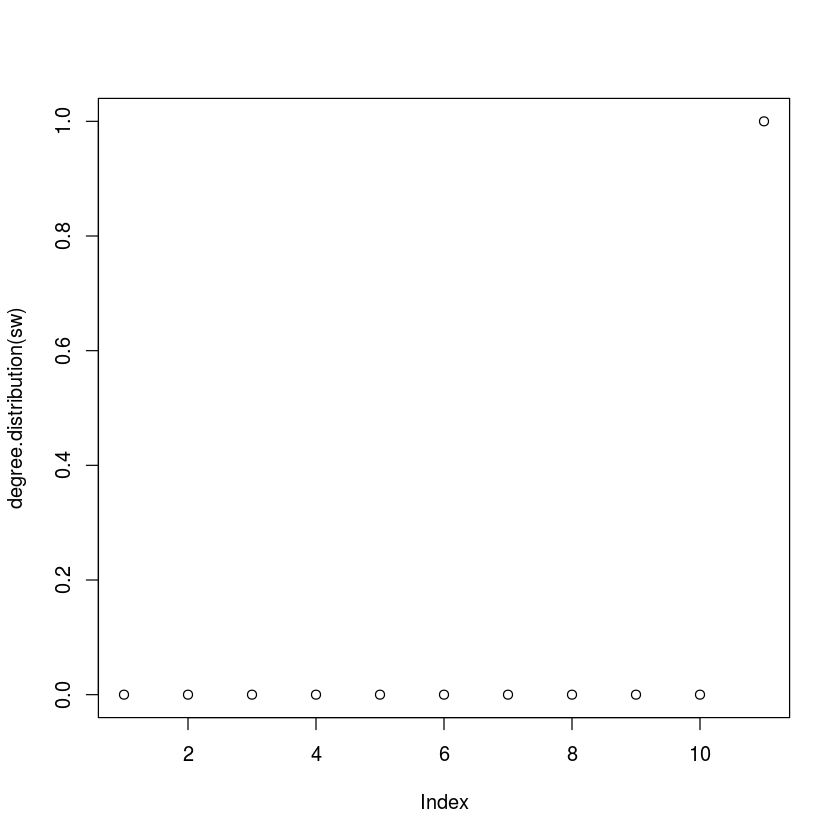

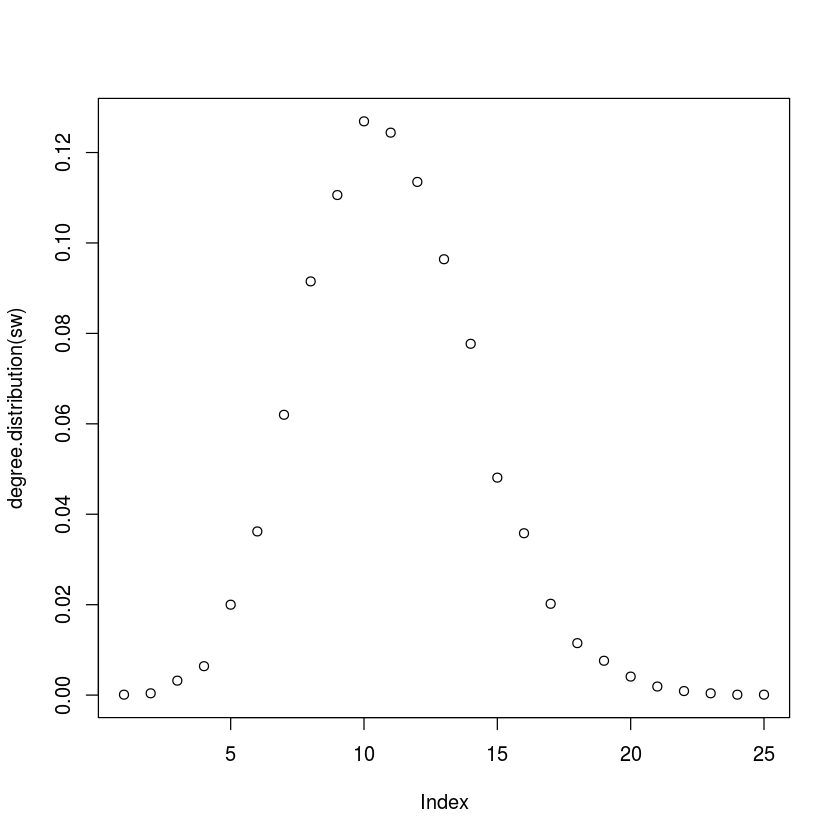

In [14]:
# Measuring the metrics of the small-world network
# Trying a regular ring for w=0
sw <- watts.strogatz.game(1,10000,5,0.0)
# all nodes have the same number of neighbors (same degree)
plot(degree.distribution(sw))

# For w=1 the network is random and equivalent
# to the erdos renyi model gamma=K/N is the same in both cases
# and w=1 means all connections are randomly rearranged
sw <- watts.strogatz.game(1,10000,5,1.0) 
average.path.length(sw) # L
transitivity(sw) # C
plot(degree.distribution(sw))
# Try different values for w in (0,1) and calculate L and C, and interpret the results

In [15]:
# We will explore aditional metrics of the network
# at diffrent scales
sw <- watts.strogatz.game(1,10,2,0.1)

# node metrics
degree(sw)
distances(sw)
closeness(sw)
# closeness is the inverse of the distance
1/rowSums(distances(sw))
betweenness(sw)

# Calculate mesoscopic metrics
distances(sw)
transitivity(sw, type="local")

# Macroscopic metrics
# Go to the slides MD08.pdf and try to calculate
# L and C and check your answer with
average.path.length(sw)
transitivity(sw)

[1] 4 4 5 5 3 5 4 3 3 4

0,1,1,2,2,2,1,2,2,1
1,0,1,1,2,2,2,2,1,2
1,1,0,1,1,1,2,2,2,2
2,1,1,0,2,1,2,1,2,1
2,2,1,2,0,2,1,2,1,2
2,2,1,1,2,0,1,1,2,1
1,2,2,2,1,1,0,1,2,2
2,2,2,1,2,1,1,0,3,2
2,1,2,2,1,2,2,3,0,1
1,2,2,1,2,1,2,2,1,0


[1] 0.07142857 0.07142857 0.07692308 0.07692308 0.06666667 0.07692308
 [7] 0.07142857 0.06250000 0.06250000 0.07142857

[1] 0.07142857 0.07142857 0.07692308 0.07692308 0.06666667 0.07692308
 [7] 0.07142857 0.06250000 0.06250000 0.07142857

[1] 2.500000 2.083333 3.666667 3.666667 2.083333 2.916667 3.583333 0.500000
 [9] 1.833333 3.166667

0,1,1,2,2,2,1,2,2,1
1,0,1,1,2,2,2,2,1,2
1,1,0,1,1,1,2,2,2,2
2,1,1,0,2,1,2,1,2,1
2,2,1,2,0,2,1,2,1,2
2,2,1,1,2,0,1,1,2,1
1,2,2,2,1,1,0,1,2,2
2,2,2,1,2,1,1,0,3,2
2,1,2,2,1,2,2,3,0,1
1,2,2,1,2,1,2,2,1,0


[1] 0.1666667 0.3333333 0.3000000 0.4000000 0.0000000 0.4000000 0.1666667
 [8] 0.6666667 0.0000000 0.1666667

[1] 1.577778

[1] 0.2857143

 [1] 1 1 2 1 5 5 5 1 2 2 5 1 1 2 3 3 5 1 3 1 3 1 3 4 4 4 3 4 2 3 2 2 3 3

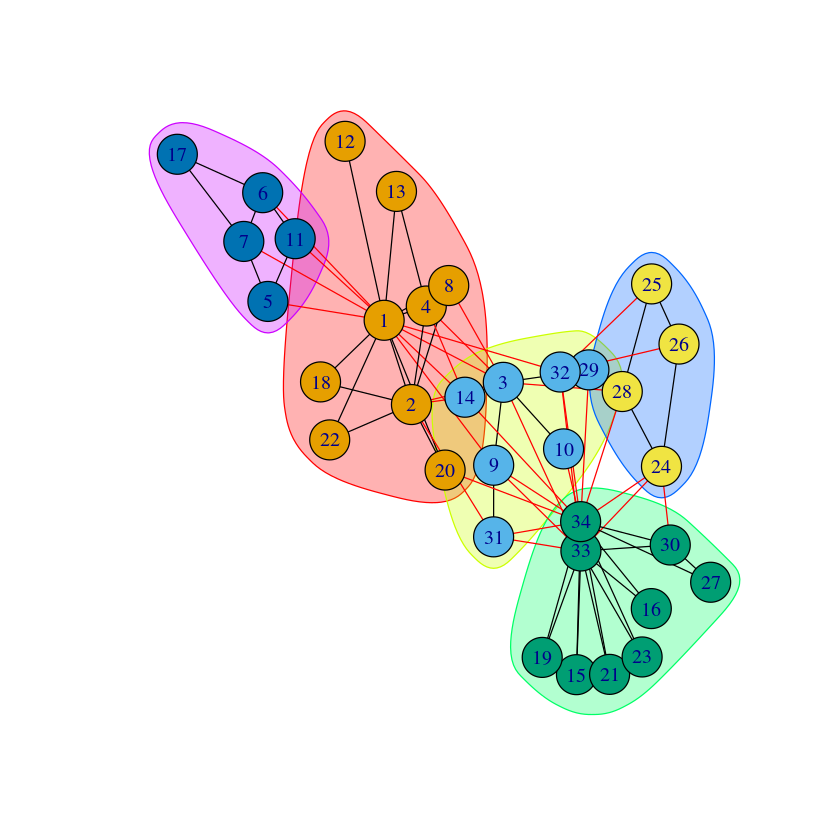

In [16]:
# Comunnity detection
# See this article: https://arxiv.org/pdf/1608.00163.pdf
# Start with a notable graph of the igraph package
# See http://igraph.org/r/doc/make_graph.html
karate <- make_graph("Zachary")
# Build the communities strucure via short random walks
# http://igraph.org/r/doc/cluster_walktrap.html
wc <- cluster_walktrap(karate)
# Here you have a label for each node according
# to the community it belongs to
membership(wc)
# plot the graph with the detected communities
plot(wc, karate)

# Network optimization algorithms

[1] 2 5 4 2 7 1 4 3 4 1 5 7

[1] 5 7 4 1 3 2 4 5 4 1 9 6

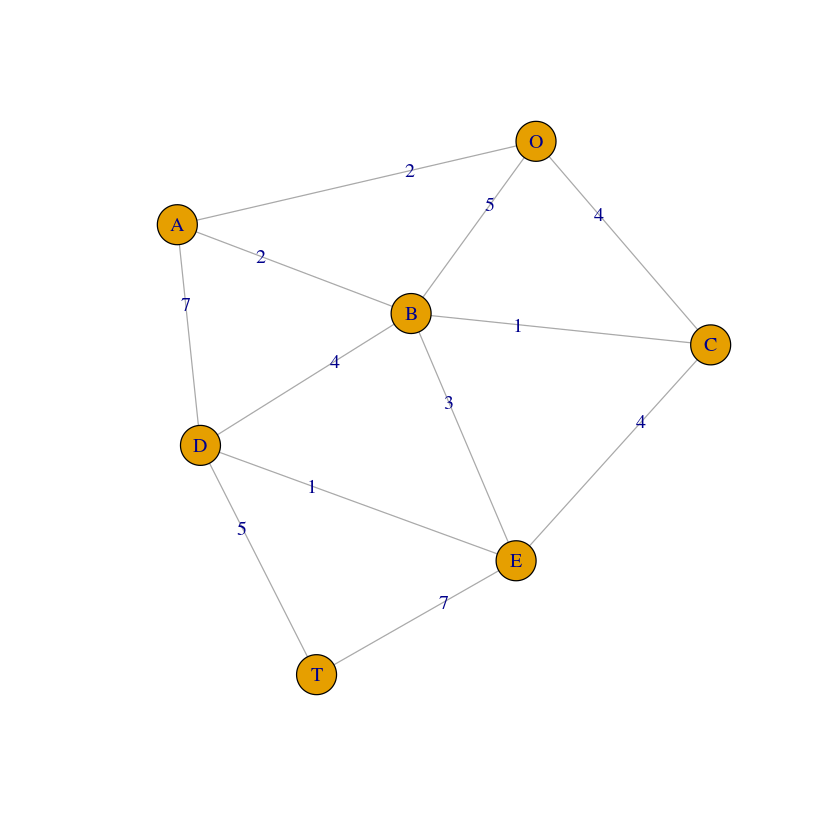

In [17]:
# Import library
library(igraph)
# Read the file and build a graph from a dataframe
# https://drive.google.com/open?id=0B-dmEvN59Z2Zdlg4UVY1cENVbzg
dat<-read.csv("seervadaPark.csv")
g <- graph_from_data_frame(dat, directed=FALSE)
# We have information about the edges weight and capacity
E(g)$weight
E(g)$capacity
plot(g, edge.label=E(g)$weight, layout=layout_nicely)

### Shortest path

In [18]:
# Shortest path problem
# Find all shortest path from O to T
asp<-all_shortest_paths(g, from="O", to="T")
# See what's in asp
asp
# This are the paths:
asp$res[[1]]
asp$res[[2]]

$res
$res[[1]]
+ 5/7 vertices, named, from e95c5d1:
[1] O A B D T

$res[[2]]
+ 6/7 vertices, named, from e95c5d1:
[1] O A B E D T


$nrgeo
[1] 1 1 1 1 2 1 2


+ 5/7 vertices, named, from e95c5d1:
[1] O A B D T

+ 6/7 vertices, named, from e95c5d1:
[1] O A B E D T

In [19]:
# Get the weights (cost) of the paths
sum(E(g, path=V(g)[asp$res[[1]]]$name)$weight)
sum(E(g, path=V(g)[asp$res[[2]]]$name)$weight)

[1] 13

[1] 13

In [20]:
# get the cost/distance of the path from the 
# distances matrix
# This is easier
distances(g)["O", "T"]

[1] 13

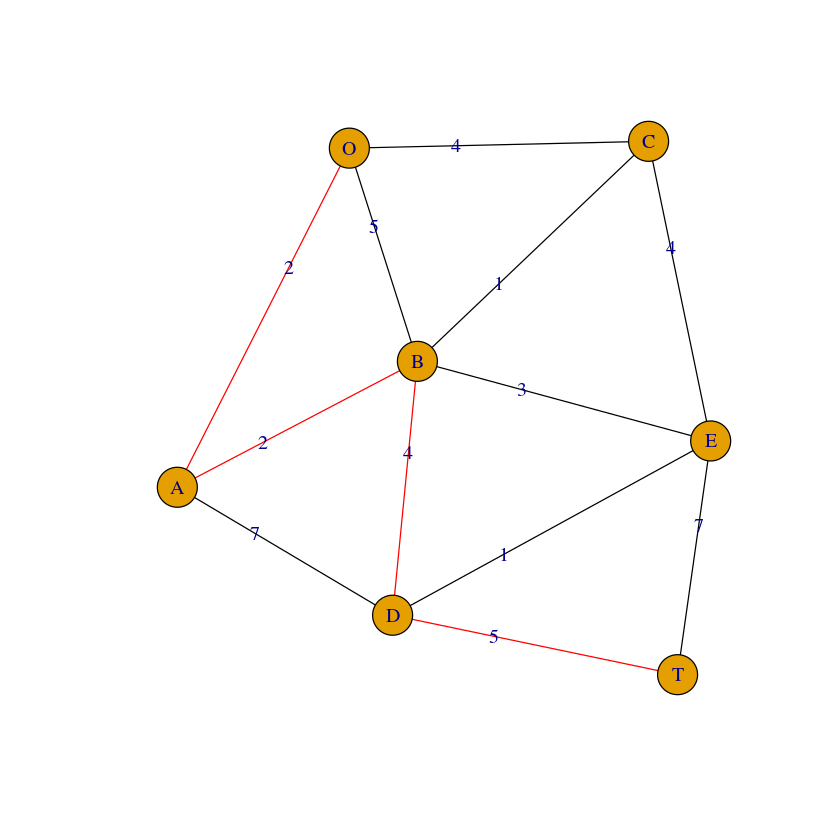

In [21]:
# Lets color the shortest path in red
E(g)$color <- "black"
E(g, path=V(g)[asp$res[[1]]]$name)$color <- "red"
plot(g, edge.label=E(g)$weight, layout=layout_nicely)

### Minimum spanning tree

[1] 14

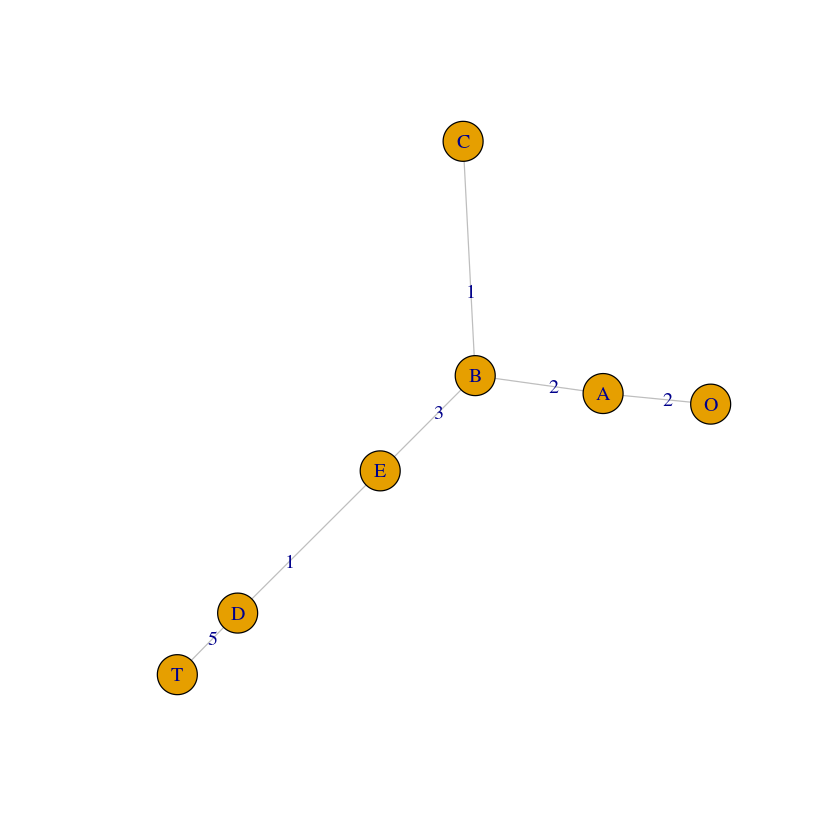

In [22]:
# Assign same color to all edges to continue
# with the MST problems
# Or use different windows for each problem
# windows()
E(g)$color<-"gray"

# Minimum spanning tree
t<-mst(g)
plot(t, edge.label=E(t)$weight)
# You can use a tree layout
# plot(t, edge.label=E(t)$weight, layout=layout_as_tree)
sum(E(t)$weight)

### Maximum flow problem

[1] 5 7 4 1 3 2 4 5 4 1 9 6

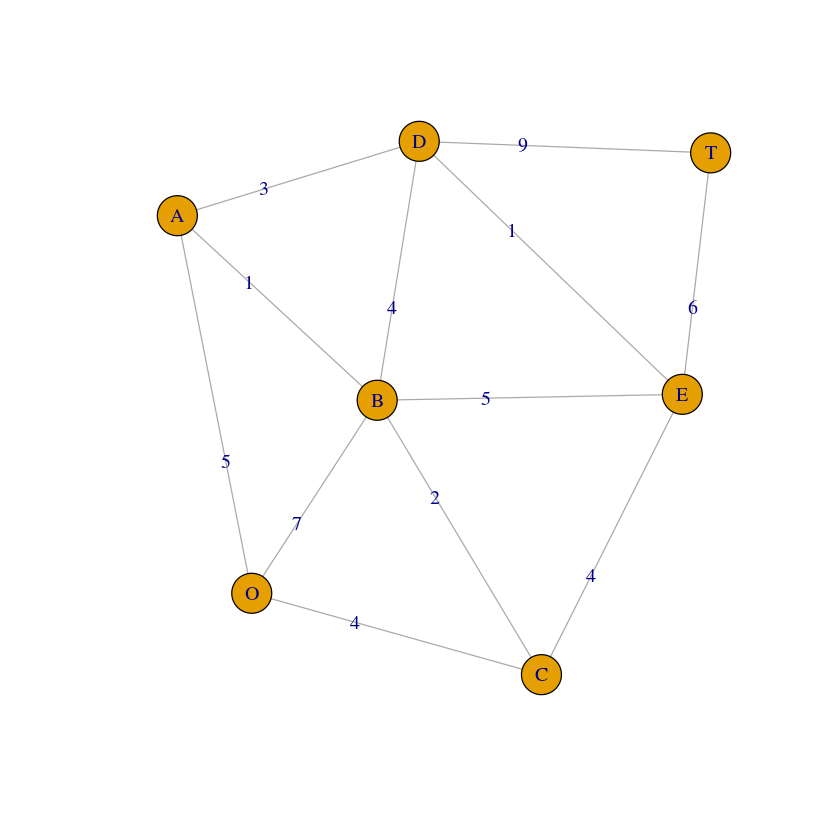

In [23]:
# Import library
library(igraph)
# Read the file and build a graph from a dataframe
# https://drive.google.com/open?id=0B-dmEvN59Z2Zdlg4UVY1cENVbzg
dat<-read.csv("seervadaPark.csv")
g <- graph_from_data_frame(dat, directed=FALSE)
# We have information about the edges capacity
E(g)$capacity
plot(g, edge.label=E(g)$capacity, layout=layout_nicely)

In [24]:
# Max flow problem
flujo<-graph.maxflow(g, source="O", target="T")
# See whats in flujo
flujo
flujo$value
flujo$flow

$value
[1] 14

$flow
 [1]  4  7  3  1  3 -1  4  5  2 -1  8  6

$cut
[1]  5  7 12 10

$partition1
+ 5/7 vertices, named, from 4b7b6e8:
[1] O A B C E

$partition2
+ 2/7 vertices, named, from 4b7b6e8:
[1] D T

$stats
$stats$nopush
[1] 11

$stats$norelabel
[1] 7

$stats$nogap
[1] 3

$stats$nogapnodes
[1] 2

$stats$nobfs
[1] 1



[1] 14

[1]  4  7  3  1  3 -1  4  5  2 -1  8  6

[1]  4  7  3  1  3 -1  4  5  2 -1  8  6

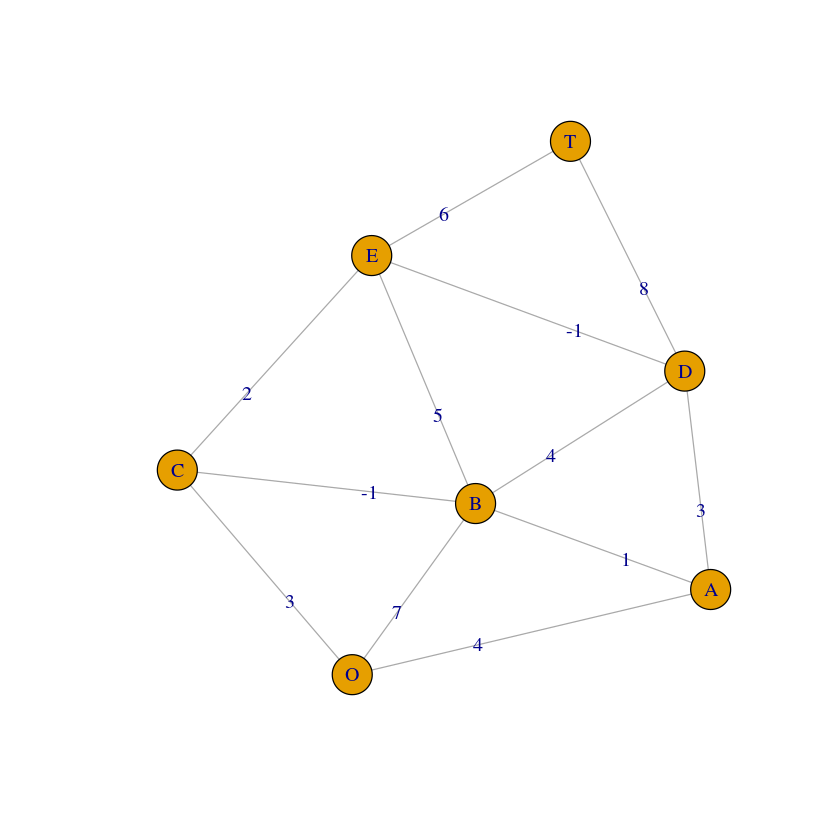

In [25]:
# Lets draw the network with the assigned flows
plot(g, edge.label=flujo$flow)
# and interpret
flujo$flow

# Check in the graph that the represented flows are correct
# a positive flow indicates that flow goes from the smaller vertex id to the bigger one
# a negative flow means that the flow goes from the bigger vertex id to the smaller one
# O -- A, has a positive flow, the direction is from O to A, O->A
# B -- C, has a negative flow, the direction is from C to B, C->B
# 
# Remember that the net flow in each transshipment vertex shuld be zero 
# Input_Flow - Output_Flow = 0
# Lets take a look at B
# Input flow = 9, coming from
# O->B: 7
# A->B: 1
# C->B: 1
# Output flow = 9
# B->D: 4
# B->E: 5
# 
# Test all other transshipment nodes, be careful intrepreting the negative 
# results in the edge flows